<a href="https://colab.research.google.com/github/kdstheace/Study_Python_MachineLearning/blob/main/SCIT40%EA%B8%B0_%EA%B9%80%EB%8F%99%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 당뇨병 데이터 읽기
2. 데이터 전처리 (8:2) 분할
3. 데이터 스케일링(범위가 너무큼)
4. 임의로 학습
5. acc ==> 85%
6. 선형그래프 그리기




In [ ]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf


from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path ='drive/MyDrive/Colab Notebooks/data/'
dataset = pd.read_csv(path+'datasets_diabetes.csv')
title_A = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
title_X = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = dataset[title]
y = dataset['Outcome']

df_A=DataFrame(dataset, columns=title_A)
df_X=df_A.drop('Outcome', axis=1)
df_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_X)
scaled_data = pd.DataFrame(scaled_data, columns=title_X)

X = scaled_data[title_X]
y = df_A['Outcome']
y = to_categorical(df_A['Outcome'])
print(X.shape)
print(y.shape)

(768, 8)
(768, 2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(614, 8)
(614, 2)
(154, 8)
(154, 2)


In [ ]:
model = Sequential()
model.add(Dense(units=200, activation='relu', input_dim=8))
model.add(Dense(units=1000, activation='relu'))
model.add(Dense(units=300, activation='relu'))
model.add(Dense(units=900, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 200)               1800      
_________________________________________________________________
dense_47 (Dense)             (None, 1000)              201000    
_________________________________________________________________
dense_48 (Dense)             (None, 300)               300300    
_________________________________________________________________
dense_49 (Dense)             (None, 900)               270900    
_________________________________________________________________
dense_50 (Dense)             (None, 500)               450500    
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 1002      
Total params: 1,225,502
Trainable params: 1,225,502
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=40, verbose=1)

Epoch 1/100
16/16 [==============================] - 0s 3ms/step - loss: 6.7619e-06 - accuracy: 1.0000
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 6.6141e-06 - accuracy: 1.0000
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 6.3795e-06 - accuracy: 1.0000
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 6.2209e-06 - accuracy: 1.0000
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 6.0511e-06 - accuracy: 1.0000
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 5.9645e-06 - accuracy: 1.0000
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 5.6425e-06 - accuracy: 1.0000
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 5.4663e-06 - accuracy: 1.0000
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 5.3775e-06 - accuracy: 1.0000
Epoch 10/100
16/16 [==============================] - 0s 4ms/step - loss:

In [ ]:
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('loss', loss)
print('acc', acc)

5/5 [==============================] - 0s 3ms/step - loss: 6.7140 - accuracy: 0.7468
loss 6.713982105255127
acc 0.7467532753944397


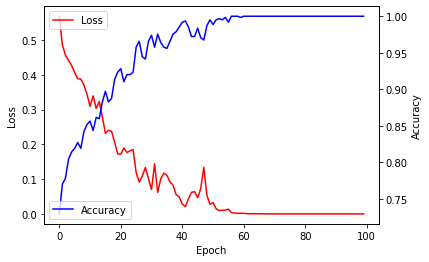

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'r', label = 'Loss')

acc_ax.plot(hist.history['accuracy'],'b', label='Accuracy')


loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Loss')

acc_ax.set_ylabel('Accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()